In [2]:
import sqlite3
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error, r2_score

In [3]:
import os
os.getcwd()

'/Users/Kim/Desktop/Github/stock-price-prediction/notebooks'

In [4]:
conn = sqlite3.connect('../data/stock_prices_polygon.db')

In [5]:
df = pd.read_sql_query("SELECT * FROM stock_prices_polygon", conn)

In [6]:
df

,ticker,date,open,high,low,close,volume
0,AAPL,2021-01-08 10:30:00,132.430,132.63,130.230,132.05,105158245.0
1,AAPL,2021-01-11 10:30:00,129.190,130.17,128.500,128.98,100617160.0
2,AAPL,2021-01-12 10:30:00,128.500,129.69,126.860,128.80,91851145.0
3,AAPL,2021-01-13 10:30:00,128.760,131.45,128.490,130.89,88636831.0
4,AAPL,2021-01-14 10:30:00,130.800,131.00,128.760,128.91,89671755.0
...,...,...,...,...,...,...,...
2510,GOOGL,2022-12-30 10:30:00,86.980,88.30,86.570,88.23,23986297.0
2511,GOOGL,2023-01-03 10:30:00,89.585,91.05,88.520,89.12,28131224.0
2512,GOOGL,2023-01-04 10:30:00,90.350,90.65,87.271,88.08,34744776.0
2513,GOOGL,2023-01-05 10:30:00,87.470,87.57,85.900,86.20,27194375.0


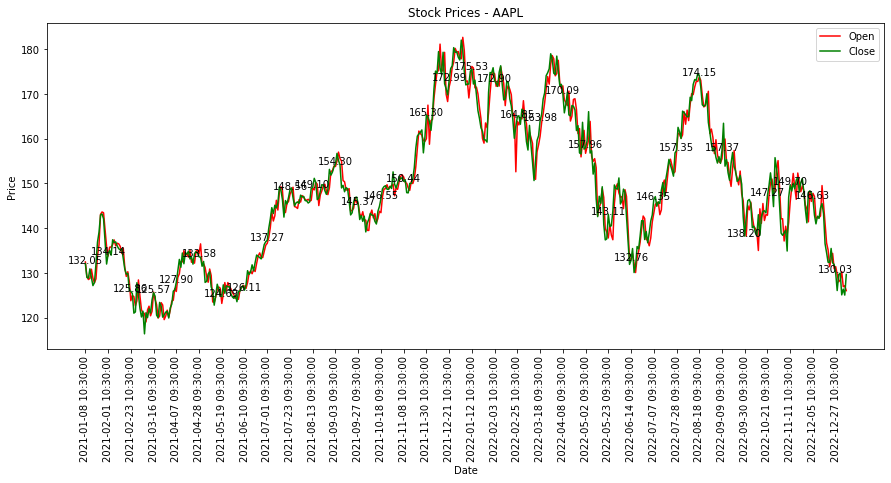

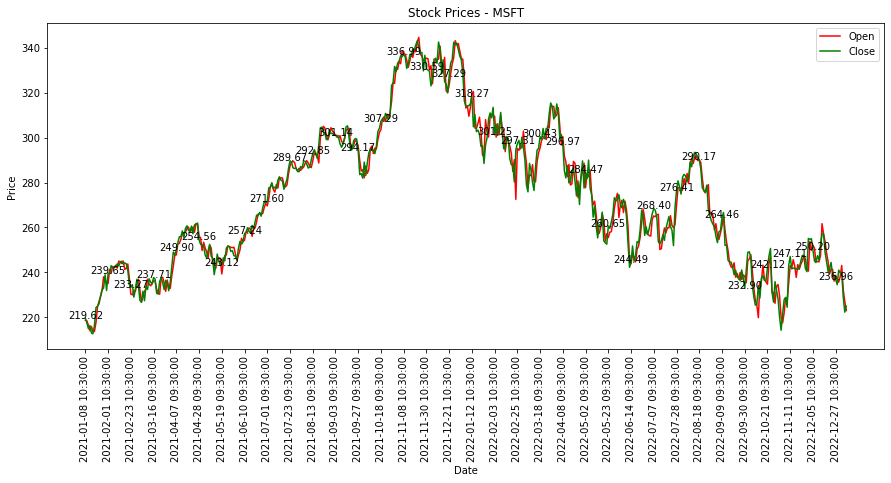

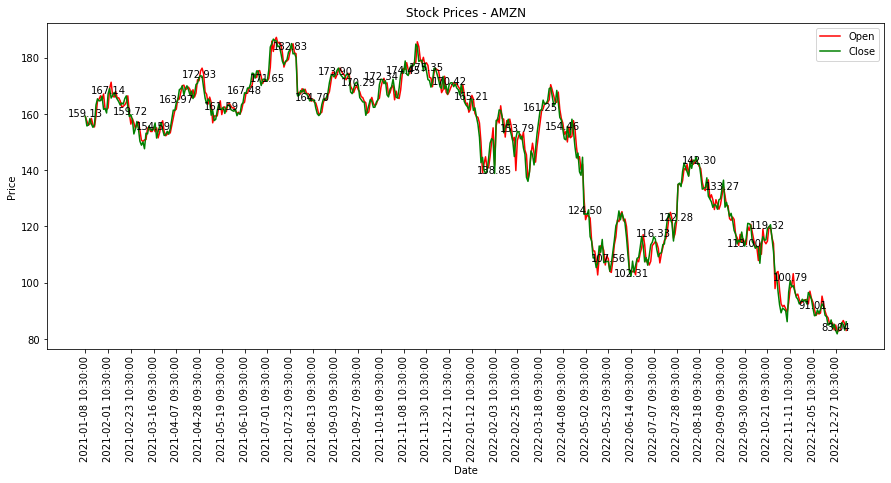

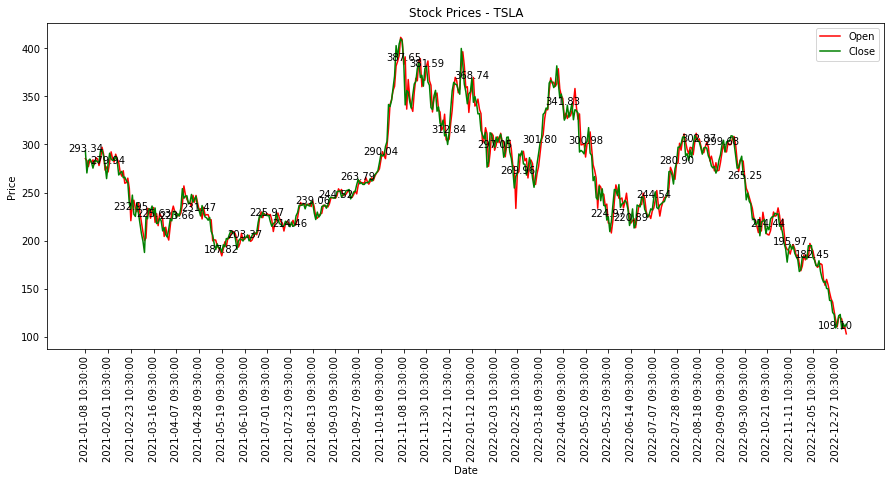

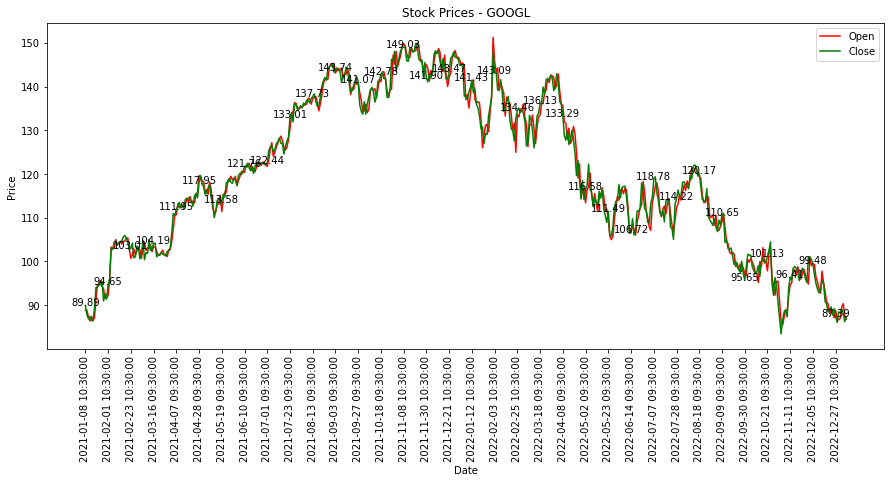

In [7]:
for ticker in ['AAPL','MSFT','AMZN','TSLA','GOOGL']:
    plt.figure(figsize=(15, 6))
    plt.plot(df[df['ticker']==ticker]['date'], df[df['ticker']==ticker]['open'], 'r', label='Open')
    plt.plot(df[df['ticker']==ticker]['date'], df[df['ticker']==ticker]['close'], 'g', label='Close')
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.title(f'Stock Prices - {ticker}')
    plt.legend()
    # Get the list of dates
    dates = df[df['ticker']==ticker]['date'].tolist()
    
    # Set the x-ticks at an interval of 60 days
    interval = 15
    plt.xticks(dates[::interval], rotation=90)
    counter=0
    for j,k in df[df['ticker']==ticker][['date','close']].values:
        if counter%15==0:
            plt.annotate(f'{k:.2f}',(j,k), ha='center')
        counter+=1
        
    
    plt.show()
    plt.show()

In [8]:
def average_forecast(n_days, n_forecast,ticker):
    # Calculate the average of the last n_days days
    average = df[-n_days:]['close'].mean()
    
    # Forecast the next n_forecast days
    forecast = [average for i in range(n_forecast)]
    
    # Calculate the root mean squared error on the test set
    rmse = np.sqrt(mean_squared_error(df[-n_forecast:]['close'], forecast))
    
    return forecast, rmse

In [ ]:
average_forecast(30,7)